In [61]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #-- This is use to resize the plots I will create

# reading into my datasheet
df = pd.read_csv(r'C:\Users\rpsstudent\Desktop\my projects\Movie Streaming Data\movies.csv')

In [62]:
#looking at my datasheet
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [63]:
# finding percentage of missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [64]:
# Looking at the data types of different columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [65]:
# converting datatypes to make it more readable and presentable
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').astype('Int64')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').astype('Int64')

In [67]:
#'De-concatenating' the released coloumn that has the year of release and country name in it
from dateutil import parser
df['release_date'] = df['released'].apply(lambda x: parser.parse(x, fuzzy=True) if pd.notna(x) else pd.NaT)
print(df.head())


                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicho

In [68]:
df = df.drop(columns=['released'])

In [69]:
pd.set_option('display.max_rows', None)

In [70]:
df['UpdatedYear'] = df['release_date'].astype(str).str[:4]

In [71]:
df = df.drop(columns=['year'])

In [72]:
#Sorting the table based on gross revenue(from highest to lowest)
df = df.sort_values(by = ['gross'],inplace = False, ascending = False)

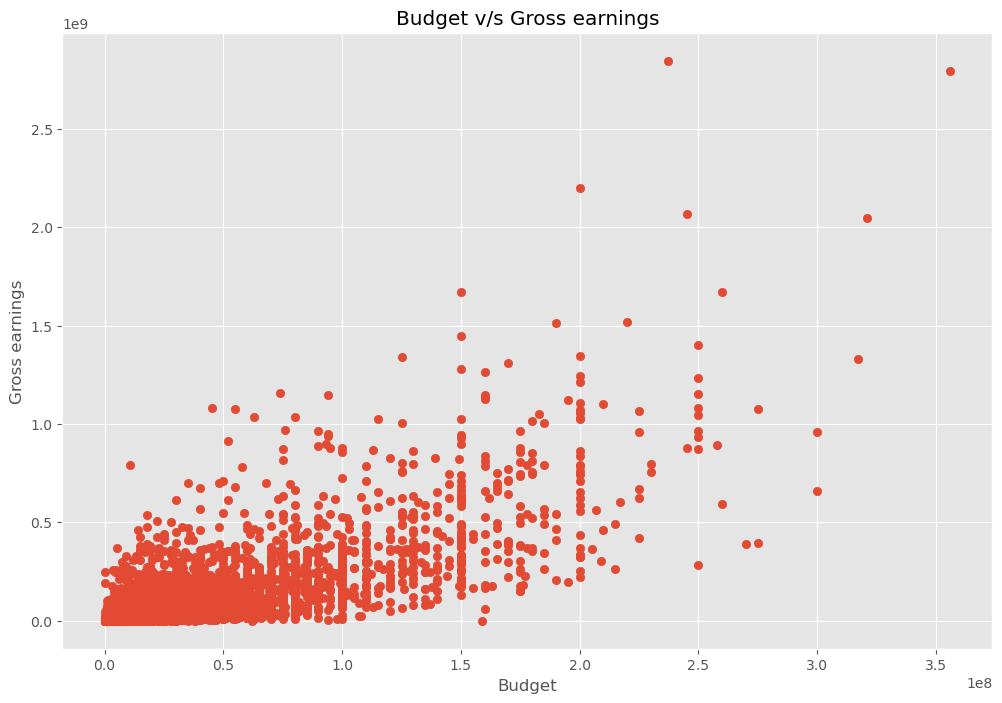

In [73]:
#creating a scatter plot
df = df.dropna(subset=['budget', 'gross'])  # Dropping rows with missing values


df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

# Creating scatter plot
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget v/s Gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross earnings')
plt.show()

In [74]:
print(df['budget'].unique())
print(df['gross'].unique())

<IntegerArray>
[237000000, 356000000, 200000000, 245000000, 321000000, 260000000, 150000000,
 220000000, 190000000, 250000000,
 ...
    135000,    650000,  18600000,    999999,     30000,   3750000,   1400000,
      6000,   2400000,  11900000]
Length: 400, dtype: Int64
<IntegerArray>
[2847246203, 2797501328, 2201647264, 2069521700, 2048359754, 1670727580,
 1670516444, 1518815515, 1515341399, 1450026933,
 ...
      11710,      10580,       8315,       5101,       5073,       2970,
       2554,       2270,        596,        309]
Length: 5433, dtype: Int64


In [75]:
print(df['budget'].dtype)
print(df['gross'].dtype)

Int64
Int64


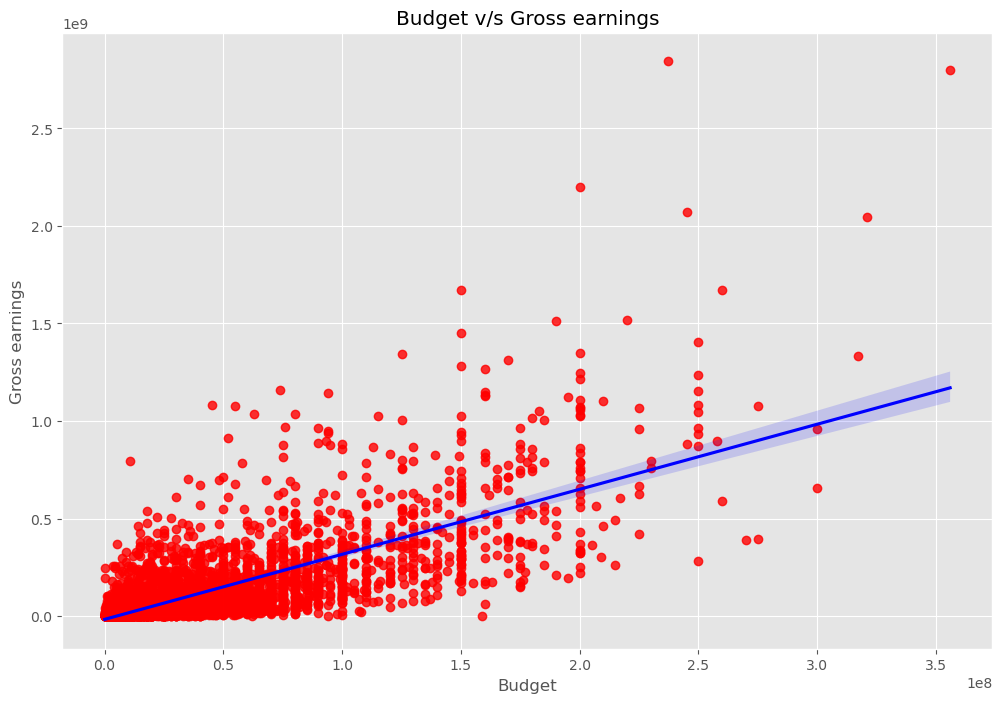

In [76]:
#creating a scatter plot and converting data to make it compatible for the regression line
df = df.dropna(subset=['budget', 'gross'])
df['budget'] = df['budget'].astype('float64')
df['gross'] = df['gross'].astype('float64')

# Creating scatter plot with regression line
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

plt.title('Budget v/s Gross earnings')
plt.xlabel('Budget')
plt.ylabel('Gross earnings')
plt.show()

In [77]:
#looking at correlation between different data
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
correlation_matrix

,score,votes,budget,gross,runtime
score,1.000000,0.473809,0.071792,0.222143,0.414580
votes,0.473809,1.000000,0.440021,0.614904,0.352437
budget,0.071792,0.440021,1.000000,0.740395,0.318595
gross,0.222143,0.614904,0.740395,1.000000,0.275596
runtime,0.414580,0.352437,0.318595,0.275596,1.000000


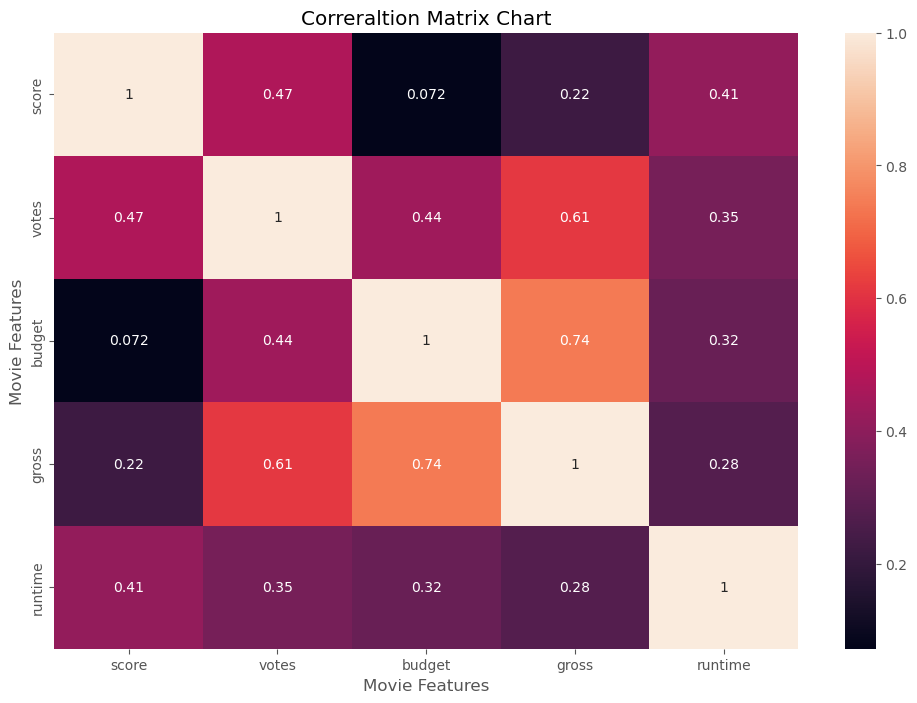

In [78]:
# visualizing the above correlation chart
sns.heatmap(correlation_matrix,annot = True)
plt.title('Correraltion Matrix Chart')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [79]:
# making all the values on the data table numeric so the entire table can be used in the correlation heat map
df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,UpdatedYear
5445,387,5,0,7.8,1100000.0,787,1265,1538,47,237000000.0,2.847246e+09,1388,162.0,2009-12-18,29
7445,389,5,0,8.4,903000.0,106,515,1474,47,356000000.0,2.797501e+09,987,181.0,2019-04-26,39
3045,4923,5,6,7.8,1100000.0,787,1265,1076,47,200000000.0,2.201647e+09,1388,194.0,1997-12-19,17
6663,3656,5,0,7.8,876000.0,770,1810,357,47,245000000.0,2.069522e+09,949,138.0,2015-12-18,35
7244,390,5,0,8.4,897000.0,106,515,1474,47,321000000.0,2.048360e+09,987,149.0,2018-04-27,38


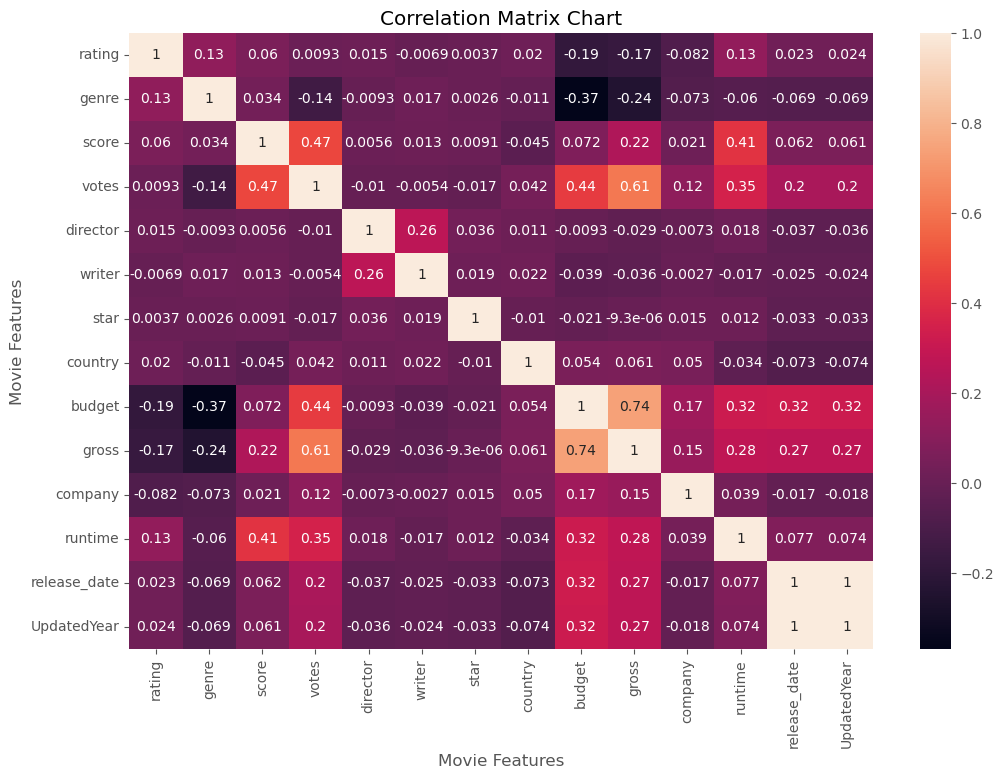

In [80]:
# using the entire table except movie names for correlation visuals
# Drop the 'name' column
df_numerized_no_name = df_numerized.drop('name', axis=1)

# Creating the correlation matrix
correlation_matrix = df_numerized_no_name.corr()

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Chart')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [51]:
correlation_matrix

,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,UpdatedYear
rating,1.000000,0.128102,0.059550,0.009255,0.014847,-0.006923,0.003737,0.020148,-0.186892,-0.168814,-0.082189,0.133239,0.022575,0.023634
genre,0.128102,1.000000,0.034061,-0.136457,-0.009303,0.017500,0.002619,-0.010847,-0.368900,-0.244380,-0.073293,-0.060186,-0.068507,-0.068848
score,0.059550,0.034061,1.000000,0.473809,0.005573,0.012860,0.009121,-0.044690,0.071792,0.222143,0.021054,0.414580,0.062407,0.061029
votes,0.009255,-0.136457,0.473809,1.000000,-0.010198,-0.005394,-0.017140,0.042146,0.440021,0.614904,0.119366,0.352437,0.204532,0.202883
director,0.014847,-0.009303,0.005573,-0.010198,1.000000,0.262940,0.036289,0.011108,-0.009340,-0.029366,-0.007337,0.018082,-0.036552,-0.036281
writer,-0.006923,0.017500,0.012860,-0.005394,0.262940,1.000000,0.019273,0.022153,-0.039420,-0.035999,-0.002658,-0.016672,-0.024584,-0.024397
star,0.003737,0.002619,0.009121,-0.017140,0.036289,0.019273,1.000000,-0.010135,-0.021282,-0.000009,0.015086,0.012439,-0.032776,-0.033168
country,0.020148,-0.010847,-0.044690,0.042146,0.011108,0.022153,-0.010135,1.000000,0.054372,0.060929,0.049559,-0.033554,-0.073346,-0.073732
budget,-0.186892,-0.368900,0.071792,0.440021,-0.009340,-0.039420,-0.021282,0.054372,1.000000,0.740395,0.171385,0.318595,0.322181,0.320245
gross,-0.168814,-0.244380,0.222143,0.614904,-0.029366,-0.035999,-0.000009,0.060929,0.740395,1.000000,0.150233,0.275596,0.270309,0.268626


In [81]:
new_cor_mat = correlation_matrix.corr()
corr_pairs = new_cor_mat.unstack()
corr_pairs

rating        rating          1.000000
              genre           0.308171
              score          -0.032582
              votes          -0.293932
              director       -0.048300
              writer         -0.077187
              star           -0.057634
              country        -0.066294
              budget         -0.517791
              gross          -0.513924
              company        -0.319508
              runtime         0.000211
              release_date   -0.162881
              UpdatedYear    -0.161442
genre         rating          0.308171
              genre           1.000000
              score          -0.111804
              votes          -0.524805
              director       -0.007004
              writer          0.044048
              star            0.008371
              country        -0.057599
              budget         -0.759861
              gross          -0.673504
              company        -0.263161
              runtime    

In [82]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.759861
budget        genre          -0.759861
gross         genre          -0.673504
genre         gross          -0.673504
              votes          -0.524805
votes         genre          -0.524805
rating        budget         -0.517791
budget        rating         -0.517791
rating        gross          -0.513924
gross         rating         -0.513924
runtime       genre          -0.319618
genre         runtime        -0.319618
rating        company        -0.319508
company       rating         -0.319508
writer        gross          -0.312479
gross         writer         -0.312479
votes         writer         -0.307695
writer        votes          -0.307695
release_date  genre          -0.302746
genre         release_date   -0.302746
UpdatedYear   genre          -0.301812
genre         UpdatedYear    -0.301812
votes         director       -0.301333
director      votes          -0.301333
country       release_date   -0.296457
release_date  country    

In [83]:
# Finding highly co-related data to the gross revenue of the movie 
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

runtime       votes           0.563678
votes         runtime         0.563678
              score           0.622357
score         votes           0.622357
runtime       score           0.626148
score         runtime         0.626148
votes         budget          0.698799
budget        votes           0.698799
votes         gross           0.829521
gross         votes           0.829521
              budget          0.938219
budget        gross           0.938219
UpdatedYear   release_date    0.999996
release_date  UpdatedYear     0.999996
rating        rating          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
genre         genre      

In [ ]:
#in-order for a movie to generate high amount of gross revenue it is more like to have a high budget and high amount of votes